In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import sys
import pandas as pd
import numpy as np
import cv2
import keras
import json
import matplotlib.pyplot as plt

import random

import tensorflow as tf

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, concatenate, Input
from keras.utils import plot_model


In [ ]:
def loadImages(path):
    '''Put files into lists and return them as one list with all images 
     in the folder'''
    image_files = sorted([os.path.join(path, file)
                          for file in os.listdir(path)
                          if file.endswith('.bmp')])
    return image_files

In [ ]:
#importing data
dataset = loadImages('/content/drive/MyDrive/anand')

In [ ]:
random.shuffle(dataset)
print(dataset)

['/content/drive/MyDrive/anand/ROI-163_S_02.bmp', '/content/drive/MyDrive/anand/ROI-140_S_09.bmp', '/content/drive/MyDrive/anand/ROI-025_S_01.bmp', '/content/drive/MyDrive/anand/ROI-098_F_04.bmp', '/content/drive/MyDrive/anand/ROI-089_S_10.bmp', '/content/drive/MyDrive/anand/ROI-194_F_04.bmp', '/content/drive/MyDrive/anand/ROI-183_S_05.bmp', '/content/drive/MyDrive/anand/ROI-084_S_02.bmp', '/content/drive/MyDrive/anand/ROI-123_F_03.bmp', '/content/drive/MyDrive/anand/ROI-119_S_09.bmp', '/content/drive/MyDrive/anand/ROI-136_F_02.bmp', '/content/drive/MyDrive/anand/ROI-073_F_10.bmp', '/content/drive/MyDrive/anand/ROI-057_F_06.bmp', '/content/drive/MyDrive/anand/ROI-149_S_06.bmp', '/content/drive/MyDrive/anand/ROI-200_S_06.bmp', '/content/drive/MyDrive/anand/ROI-155_F_08.bmp', '/content/drive/MyDrive/anand/ROI-128_S_06.bmp', '/content/drive/MyDrive/anand/ROI-127_S_03.bmp', '/content/drive/MyDrive/anand/ROI-088_S_03.bmp', '/content/drive/MyDrive/anand/ROI-202_F_09.bmp', '/content/drive/MyD

In [ ]:
#indexing
test = {}
train = {}
train_path = []
test_path = []
y_train = []
y_test = []
for i in range(len(dataset)):
  if dataset[i].split('-')[1].split('_')[1] == 'F':
    train[dataset[i]]=int(dataset[i].split('-')[1].split('_')[0])-1
    train_path.append(dataset[i])
    y_train.append(int(dataset[i].split('-')[1].split('_')[0])-1)
  elif dataset[i].split('-')[1].split('_')[1] == 'S':
    test[dataset[i]]=int(dataset[i].split('-')[1].split('_')[0])-1
    test_path.append(dataset[i])
    y_test.append(int(dataset[i].split('-')[1].split('_')[0])-1)

In [ ]:
y_train = keras.utils.to_categorical(
    y_train, num_classes=212, dtype='float32'
)
y_test = keras.utils.to_categorical(
    y_test, num_classes=212, dtype='float32'
)

In [ ]:
print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
def processing(data):
    img = [cv2.imread(i) for i in data[:3]]
    #try:
    #    print('Original size',img[0].shape)
    #except AttributeError:
    #    print("shape not found")
    #cv2_imshow(img[1])
    # --------------------------------
    # setting dim of the resize
    height = 120
    width = 120
    dim = (width, height)
    res_img = []
    for i in range(len(img)):
        res = cv2.resize(img[i], dim, interpolation=cv2.INTER_LINEAR)
        gray_res = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
        gray_reshape = np.reshape(gray_res, (120,120,1))
        res_img.append(gray_res)

    # Checking the size
    #try:
    #    print('Resized Gray Image', res_img[1].shape)
    #except AttributeError:
    #    print("shape not found")
    #cv2_imshow(res_img[1])
    # ----------------------------------
    # The declaration of CLAHE  
    # clipLimit -> Threshold for contrast limiting
    clahe_img = []
    for i in range(len(res_img)):
        clahe = cv2.createCLAHE(clipLimit = 40) 
        clahe_ind = clahe.apply(res_img[i]) + 30
        clahe_img.append(clahe_ind)
    #try:
    #    print('Clahe Image')
    #except AttributeError:
    #    print("shape not found")
    #cv2_imshow(clahe_img[1])

    return np.array(res_img), np.array(clahe_img)

In [ ]:
train_res, train_clahe = processing(train_path)
test_res, test_clahe = processing(test_path)

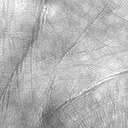

(128, 128, 3)


In [ ]:
cv2_imshow(cv2.imread(train_path[0]))
print(cv2.imread(train_path[0]).shape)

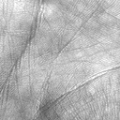

(120, 120)


In [ ]:
cv2_imshow(train_res[0])
print(train_res[0].shape)

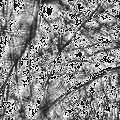

(120, 120)


In [ ]:
cv2_imshow(train_clahe[0])
print(train_res[0].shape)

In [ ]:
input_layer_norm = Input(shape=(120,120,1),name = 'inputs_layer_norm')
x = Conv2D(16, kernel_size = (3,3), activation = 'relu')(input_layer_norm)
x = MaxPooling2D(pool_size = (2,2),strides=2)(x)
x = Conv2D(16, kernel_size = (3,3), activation = 'relu')(x)
x = MaxPooling2D(pool_size = (2,2),strides=2)(x)
x = Conv2D(16, kernel_size = (3,3), activation = 'relu')(x)
x = MaxPooling2D(pool_size = (2,2),strides=2)(x)
x = Dropout(0.25)(x)
x = Flatten()(x)
x = Dense(1500, activation = 'relu')(x)
x = Dropout(0.5)(x)
x = Dense(212, activation = 'softmax')(x)

input_layer_clahe = Input(shape=(120,120,1),name = 'inputs_layer_clahe')
y = Conv2D(16, kernel_size = (3,3), activation = 'relu')(input_layer_clahe)
y = MaxPooling2D(pool_size = (2,2),strides=2)(y)
y = Conv2D(16, kernel_size = (3,3), activation = 'relu')(y)
y = MaxPooling2D(pool_size = (2,2),strides=2)(y)
y = Conv2D(16, kernel_size = (3,3), activation = 'relu')(y)
y = MaxPooling2D(pool_size = (2,2),strides=2)(y)
y = Dropout(0.25)(y)
y = Flatten()(y)
y = Dense(1500, activation = 'relu')(y)
y = Dropout(0.5)(y)
y = Dense(212, activation = 'softmax')(y)

concat = concatenate([x, y], name='Concatenate')
final_out = Dense(212, activation = 'softmax')(concat)
final_model = Model(inputs=[input_layer_norm, input_layer_clahe], outputs=final_out,
                    name='Final_output')

final_model.summary()

Model: "Final_output"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs_layer_norm (InputLayer)  [(None, 120, 120, 1) 0                                            
__________________________________________________________________________________________________
inputs_layer_clahe (InputLayer) [(None, 120, 120, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 118, 118, 16) 160         inputs_layer_norm[0][0]          
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 118, 118, 16) 160         inputs_layer_clahe[0][0]         
_______________________________________________________________________________________

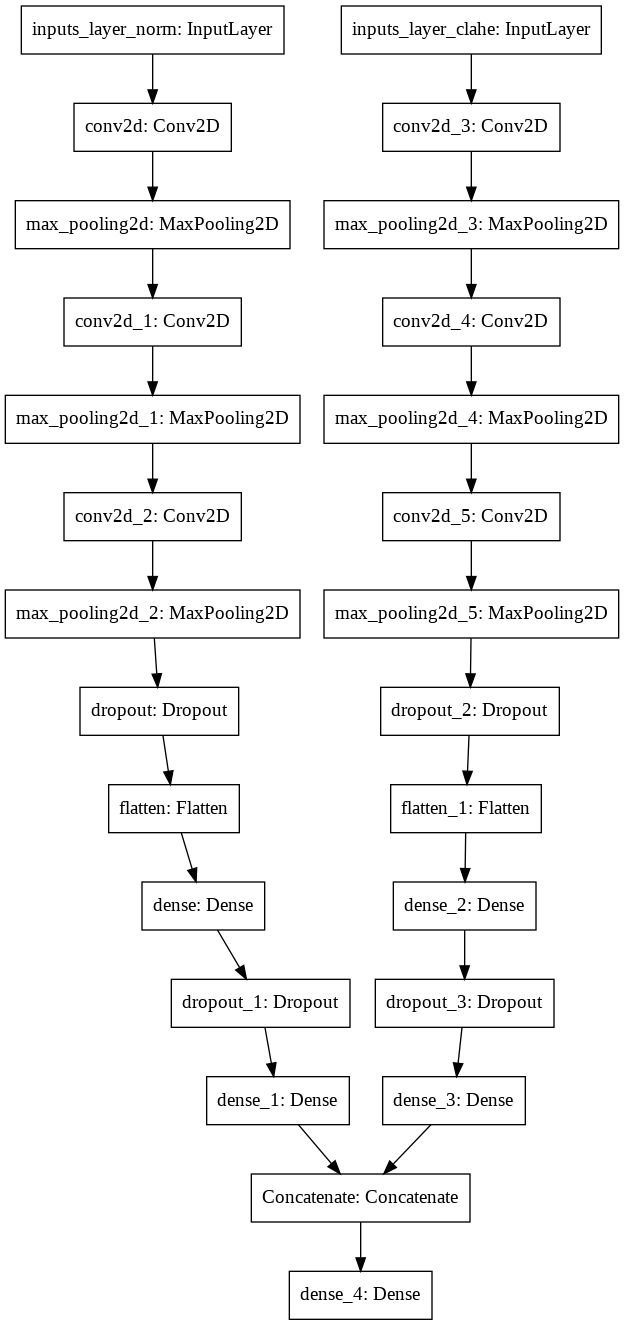

In [ ]:
plot_model(final_model)

In [ ]:
final_model.compile(optimizer='sgd',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
history = final_model.fit({'input_layer_norm':train_res, 'input_layer_clahe':train_clahe},y_train, epochs = 100)

Epoch 1/100
67/67 [==============================] - 36s 535ms/step - loss: 5.3598 - accuracy: 0.0047
Epoch 2/100
67/67 [==============================] - 36s 532ms/step - loss: 5.3610 - accuracy: 0.0051
Epoch 3/100
67/67 [==============================] - 36s 533ms/step - loss: 5.3596 - accuracy: 0.0051
Epoch 4/100
67/67 [==============================] - 36s 531ms/step - loss: 5.3591 - accuracy: 0.0061
Epoch 5/100
67/67 [==============================] - 36s 532ms/step - loss: 5.3600 - accuracy: 0.0066
Epoch 6/100
67/67 [==============================] - 36s 531ms/step - loss: 5.3593 - accuracy: 0.0051
Epoch 7/100
67/67 [==============================] - 36s 532ms/step - loss: 5.3597 - accuracy: 0.0047
Epoch 8/100
67/67 [==============================] - 36s 532ms/step - loss: 5.3597 - accuracy: 0.0042
Epoch 9/100
67/67 [==============================] - 36s 534ms/step - loss: 5.3591 - accuracy: 0.0051
Epoch 10/100
67/67 [==============================] - 36s 537ms/step - loss: 5.359

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


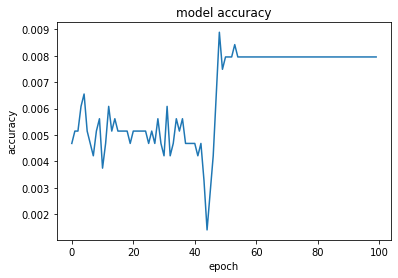

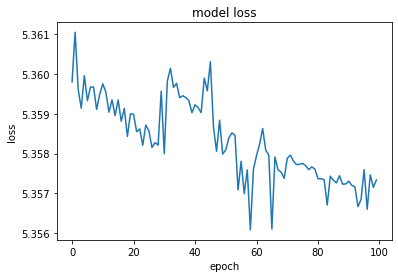

In [ ]:
plt.plot(history.history['accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()
# "Loss"
plt.plot(history.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

In [ ]:
test_loss,test_acc = final_model.evaluate({'input_layer_norm':test_res, 'input_layer_clahe':test_clahe},y_test)

66/66 [==============================] - 11s 168ms/step - loss: 5.3577 - accuracy: 0.0047
